In [6]:
!pip install graphviz
!pip install networkx
!apt-get install -y graphviz
!pip install graphviz pydot

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [7]:
import graphviz
import networkx as nx
import matplotlib.pyplot as plt
import pydot

W tym projekcię będę wizualizował drzewo Targaryenów z gry o tron za pomocą graphviz oraz networkx

W poniższym bloku znajdują sie imiona ,daty śmierci/narodzin,potomstwo oraz rolę każdego z członków rodziny (król,królowa itd.)

Dlaczego wybrałem akuratie tę rodzinę?


In [3]:
targaryen_tree = {
    'Aegon the Conqueror': {'birth': '27 BC', 'death': '37 AC', 'role': 'King', 'children': ['Rhaenys Targaryen', 'Visenya Targaryen']},
    'Rhaenys Targaryen': {'birth': '20 BC', 'death': '10 AC', 'role': 'Queen', 'children': ['Aenys I Targaryen']},
    'Visenya Targaryen': {'birth': '20 BC', 'death': '44 AC', 'role': 'Queen', 'children': ['Maegor I Targaryen']},
    'Aenys I Targaryen': {'birth': '7 AC', 'death': '42 AC', 'role': 'King', 'children': ['Jaehaerys I Targaryen', 'Alysanne Targaryen']},
    'Maegor I Targaryen': {'birth': '12 AC', 'death': '48 AC', 'role': 'King', 'children': []},
    'Jaehaerys I Targaryen': {'birth': '34 AC', 'death': '103 AC', 'role': 'King', 'children': ['Daenerys Targaryen', 'Aemon Targaryen', 'Baelon Targaryen']},
    'Alysanne Targaryen': {'birth': '36 AC', 'death': '100 AC', 'role': 'Queen', 'children': []},
    'Daenerys Targaryen': {'birth': '60 AC', 'death': '87 AC', 'role': 'Princess', 'children': []},
    'Aemon Targaryen': {'birth': '55 AC', 'death': '92 AC', 'role': 'Prince', 'children': []},
    'Baelon Targaryen': {'birth': '57 AC', 'death': '101 AC', 'role': 'Prince', 'children': ['Viserys I Targaryen', 'Daemon Targaryen']},
    'Viserys I Targaryen': {'birth': '77 AC', 'death': '129 AC', 'role': 'King', 'children': ['Rhaenyra Targaryen']},
    'Daemon Targaryen': {'birth': '81 AC', 'death': '130 AC', 'role': 'Prince', 'children': []},
    'Rhaenyra Targaryen': {'birth': '97 AC', 'death': '130 AC', 'role': 'Queen', 'children': ['Aegon II Targaryen', 'Viserys II Targaryen']},
    'Aegon II Targaryen': {'birth': '107 AC', 'death': '131 AC', 'role': 'King', 'children': []},
    'Viserys II Targaryen': {'birth': '122 AC', 'death': '172 AC', 'role': 'King', 'children': ['Aerys I Targaryen', 'Maekar I Targaryen']},
    'Aerys I Targaryen': {'birth': '125 AC', 'death': '157 AC', 'role': 'King', 'children': []},
    'Maekar I Targaryen': {'birth': '136 AC', 'death': '171 AC', 'role': 'King', 'children': ['Aegon V Targaryen']},
    'Aegon V Targaryen': {'birth': '160 AC', 'death': '209 AC', 'role': 'King', 'children': ['Jaehaerys II Targaryen']},
    'Jaehaerys II Targaryen': {'birth': '190 AC', 'death': '221 AC', 'role': 'King', 'children': ['Aerys II Targaryen']},
    'Aerys II Targaryen': {'birth': '194 AC', 'death': '283 AC', 'role': 'King', 'children': ['Rhaegar Targaryen', 'Viserys Targaryen', 'Daenerys Targaryen']},
    'Rhaegar Targaryen': {'birth': '259 AC', 'death': '283 AC', 'role': 'Prince', 'children': []},
    'Viserys Targaryen': {'birth': '276 AC', 'death': '298 AC', 'role': 'Prince', 'children': []},
    'Daenerys Targaryen': {'birth': '282 AC', 'death': 'N/A', 'role': 'Queen', 'children': []}
}

W tej komórce tworzym graf gdzie dodatkow dodajemy kolor odowidający kazdej roli jką dan postać miała

In [4]:
def get_node_color(role):
    if role == 'King':
        return 'lightblue'
    elif role == 'Queen':
        return 'lightpink'
    elif role == 'Prince':
        return 'lightgreen'
    elif role == 'Princess':
        return 'lightyellow'
    else:
        return 'white'

# Tworzymy graf tutaj za pomocą funckja Digraph z biliotego graphiz
dot = graphviz.Digraph(comment='Rodzina Targaryenów')


#Tworzenie węzłów i krawędzi:

for parent, info in targaryen_tree.items():
    birth_death = f"({info['birth']} - {info['death']})"
    color = get_node_color(info['role'])
    dot.node(parent, f"{parent}\n{birth_death}", style='filled', fillcolor=color, shape='ellipse')
    for child in info['children']:
        child_info = targaryen_tree[child]
        child_birth_death = f"({child_info['birth']} - {child_info['death']})"
        child_color = get_node_color(child_info['role'])
        dot.node(child, f"{child}\n{child_birth_death}", style='filled', fillcolor=child_color, shape='ellipse')
        dot.edge(parent, child, color='grey')

In [5]:
#renderowanie grafu i zapisywanie do formatu png



dot.render('targaryen_tree_with_dates_and_styles', format='png', view=True)

'targaryen_tree_with_dates_and_styles.png'

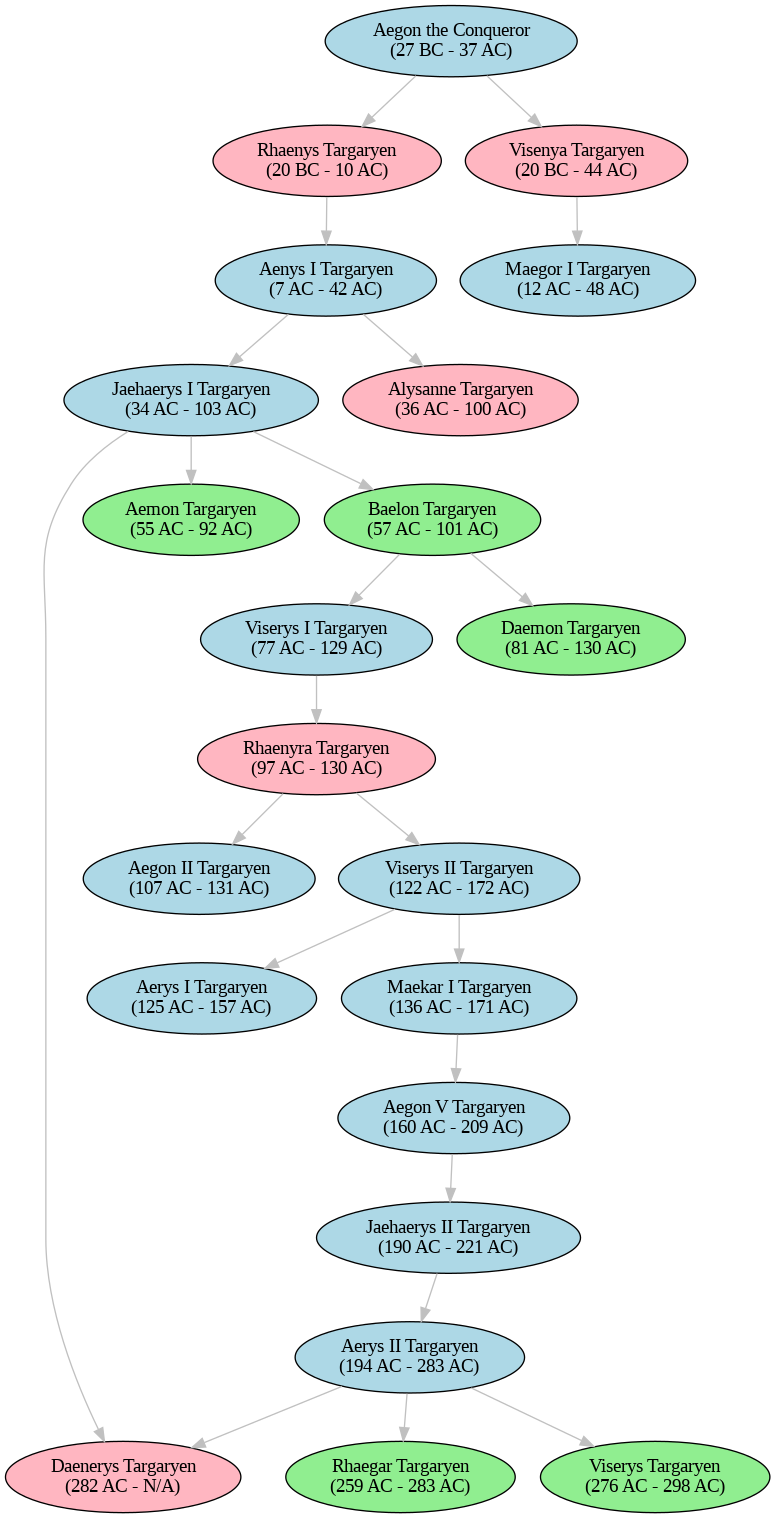

In [8]:
from IPython.display import Image

# Wyświetlenie wygenerowanego grafu
Image(filename='targaryen_tree_with_dates_and_styles.png')

In [9]:
#tutaj za pomoca drugiego sposobu. czyli biblioteki networkx
#tak naprawdę jest to to samo co w pooprzedni przykładnie tylko tym razem używamy innych funckji z innej bilioteki
#

G = nx.DiGraph()


for parent, info in targaryen_tree.items():
    G.add_node(parent, birth=info['birth'], death=info['death'], role=info['role'])
    for child in info['children']:
        G.add_node(child, birth=targaryen_tree[child]['birth'], death=targaryen_tree[child]['death'], role=targaryen_tree[child]['role'])
        G.add_edge(parent, child)


color_map = [get_node_color(G.nodes[node]['role']) for node in G]

Tutaj  komórka odpowiada za wizaluzacje  naszego grafu . Używam tutaj funkcji z biblioteki plt :

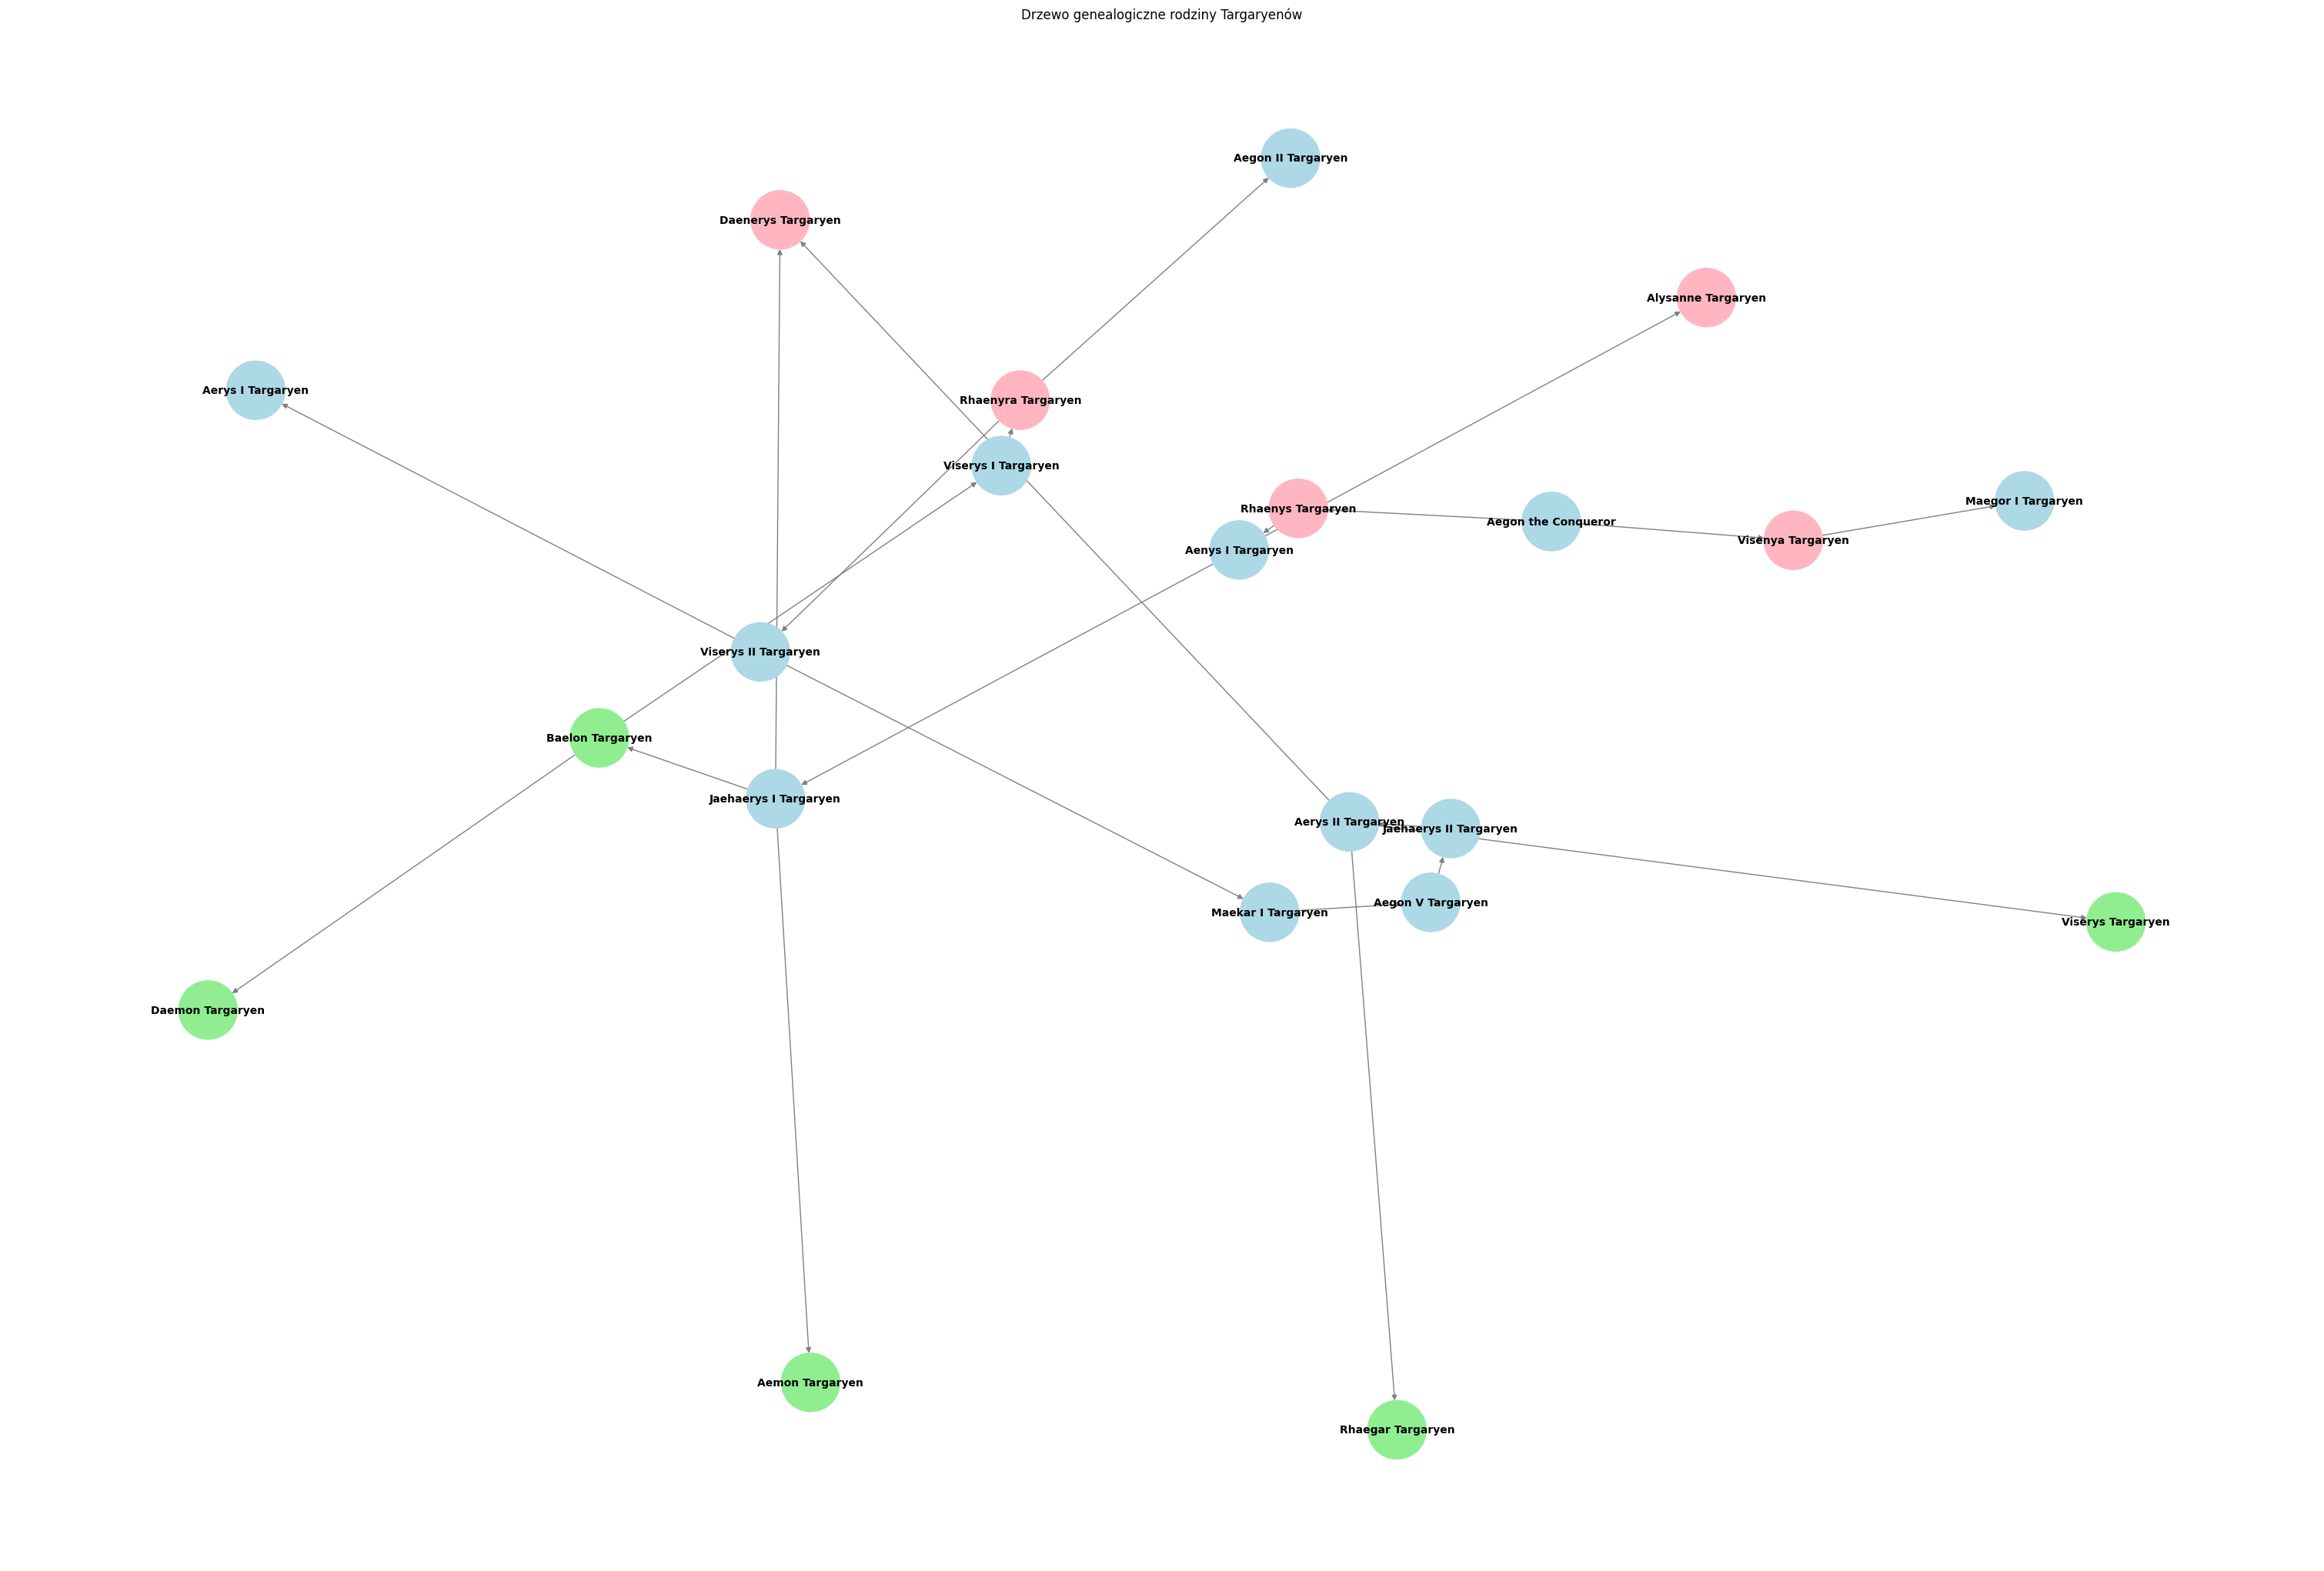

In [11]:
# wadą tego sposobu jest taak iż jes on bardziej chaotyczny oraz trzeba wybrać odowedni rozmiar wyświetlanego grafu by nasiebie nie nakładały rózne wierchołki

plt.figure(figsize=(30, 20))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=3000, font_size=10, font_weight='bold', edge_color='grey')
plt.title('Drzewo genealogiczne rodziny Targaryenów')
plt.show()

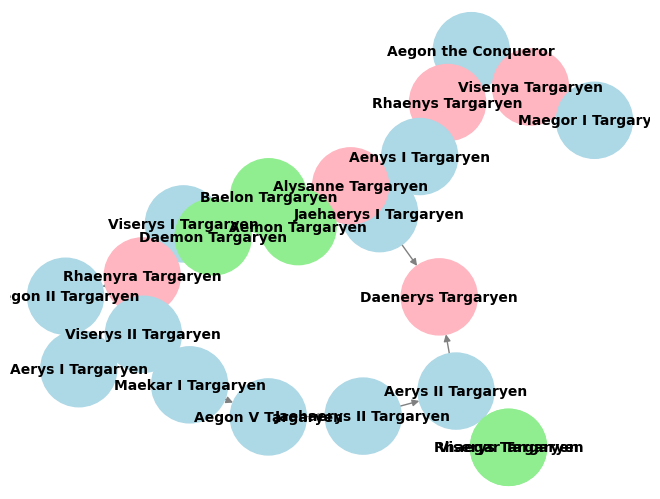

In [13]:
pos2 = nx.kamada_kawai_layout(G)

nx.draw(G, pos2, with_labels=True, node_color=color_map, node_size=3000, font_size=10, font_weight='bold', edge_color='grey')